# Classifying Chest Pain

>## Authors: Derek, Eric, and Selina

### Introduction

Heart disease can refer to several types of heart conditions which will affect the function of the heart. There are many reasons and key risk factors that cause heart diseases such as high blood pressure, high blood cholesterol, and some other unhealthy behaviours that are harmful to our bodies. The most common symptom of heart disease is chest pain. The heart-related chest pain is pressure or tightness in your chest. There are also many types of chest pain caused by reduced blood flow to the heart. Our project will focus on the different factors that can lead to chest pain. The predictive question of classification that we will attempt to answer is whether serum cholesterol, resting blood pressure, and maximum heart rate achieved can be used to predict what type of chest pain an individual will have. The dataset that we use to answer the question is the heart disease dataset within the “heart_disease.data” from the dataset folder which contains the information and values related to heart diseases along with the “heart_disease_description.names” so understand the column names and values.


In [73]:
set.seed(1)
library(dplyr)
library(readxl)
library(tidyverse)

heart_disease_data <- read_csv("data/heart_disease.data", col_names = FALSE, na = c("?")) |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>
    mutate(cp = as_factor(cp)) |>
    drop_na(chol) |>
    filter(chol != 0)
heart_disease_data

Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2
55,1,4,142,228,0,1,149,1,2.5,1,NA,NA,1
66,1,3,110,213,1,2,99,1,1.3,2,NA,NA,0
65,1,4,150,236,1,1,105,1,0.0,NA,NA,NA,3
60,1,2,160,267,1,1,157,0,0.5,2,NA,NA,1
56,1,2,126,166,0,1,140,0,0.0,NA,NA,NA,0
62,1,4,120,220,0,1,86,0,0.0,NA,NA,NA,0


In [74]:
library(tidymodels)

heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = cp)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) 

In [75]:
glimpse(heart_disease_train)

Rows: 107
Columns: 14
$ age      <dbl> 66, 55, 60, 67, 55, 65, 72, 55, 62, 49, 62, 48, 61, 68, 62, 7…
$ sex      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ cp       <fct> 3, 3, 3, 1, 2, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 2…
$ trestbps <dbl> 110, NA, NA, 142, 110, NA, 120, NA, 112, NA, NA, 132, 142, NA…
$ chol     <dbl> 213, 228, 316, 270, 214, 252, 214, 245, 258, 142, 204, 220, 2…
$ fbs      <dbl> 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0…
$ restecg  <dbl> 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1…
$ thalach  <dbl> 99, NA, NA, 125, 180, NA, 102, NA, 150, NA, NA, 162, 100, NA,…
$ exang    <dbl> 1, NA, NA, 0, 0, NA, 1, NA, 1, NA, NA, 0, 0, NA, 0, NA, NA, 0…
$ oldpeak  <dbl> 1.3, NA, NA, 2.5, NA, NA, 1.0, NA, NA, NA, NA, 0.0, 1.5, NA, …
$ slope    <dbl> 2, NA, NA, 1, NA, NA, 2, NA, NA, NA, NA, NA, 3, NA, NA, NA, N…
$ ca       <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ thal     <dbl> N

In [76]:
glimpse(heart_disease_test)

Rows: 37
Columns: 14
$ age      <dbl> 55, 65, 60, 63, 46, 56, 57, 42, 56, 51, 62, 75, 40, 60, 35, 6…
$ sex      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ cp       <fct> 4, 4, 2, 4, 4, 4, 4, 3, 2, 3, 4, 4, 3, 4, 3, 3, 4, 3, 2, 4, 4…
$ trestbps <dbl> 142, 150, 160, 170, 110, 120, NA, 134, 124, NA, 135, 136, 106…
$ chol     <dbl> 228, 236, 267, 177, 236, 100, 277, 240, 224, 339, 297, 225, 2…
$ fbs      <dbl> 0, 1, 1, 0, 0, 0, 1, NA, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, …
$ restecg  <dbl> 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1…
$ thalach  <dbl> 149, 105, 157, 84, 125, 120, NA, 160, 161, NA, 130, 112, 80, …
$ exang    <dbl> 1, 1, 0, 1, 1, 1, NA, 0, 0, NA, 1, 1, 1, NA, NA, 0, 1, NA, NA…
$ oldpeak  <dbl> 2.5, 0.0, 0.5, 2.5, 2.0, 1.5, NA, 0.0, 2.0, NA, 1.0, 3.0, 0.0…
$ slope    <dbl> 1, NA, 2, 3, 2, 2, NA, NA, 2, NA, 2, 2, NA, NA, NA, NA, 1, NA…
$ ca       <dbl> NA, NA, NA, NA, NA, 0, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ thal     <dbl> NA

In [77]:
heart_disease_observations <- heart_disease_train |>
                      group_by(cp) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))
heart_disease_observations

cp,n,percent
<fct>,<int>,<dbl>
1,7,6.542056
2,7,6.542056
3,20,18.691589
4,73,68.224299


In [78]:
heart_trestbps <- heart_disease_train |>
                      group_by(trestbps) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train)) |>
                      filter(is.na(trestbps))
heart_trestbps
heart_chol <- heart_disease_train |>
                      group_by(chol) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))|>
                      filter(is.na(chol))
heart_chol
heart_thalach <- heart_disease_train |>
                      group_by(thalach) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(heart_disease_train))|>
                      filter(is.na(thalach))
heart_thalach

heart_trestbps_mean <- heart_disease_train |>
                      group_by(trestbps) |> 
                      summarize(n = n()) |>
                      mutate(percent = mean(trestbps)) 
heart_trestbps_mean

trestbps,n,percent
<dbl>,<int>,<dbl>
NA,28,26.16822


chol,n,percent
<dbl>,<int>,<dbl>


thalach,n,percent
<dbl>,<int>,<dbl>
NA,28,26.16822


trestbps,n,percent
<dbl>,<int>,<dbl>
96,1,NA
100,1,NA
110,6,NA
112,1,NA
114,1,NA
116,1,NA
118,1,NA
120,7,NA
122,4,NA


Warning message:
“Removed 28 rows containing missing values (geom_point).”


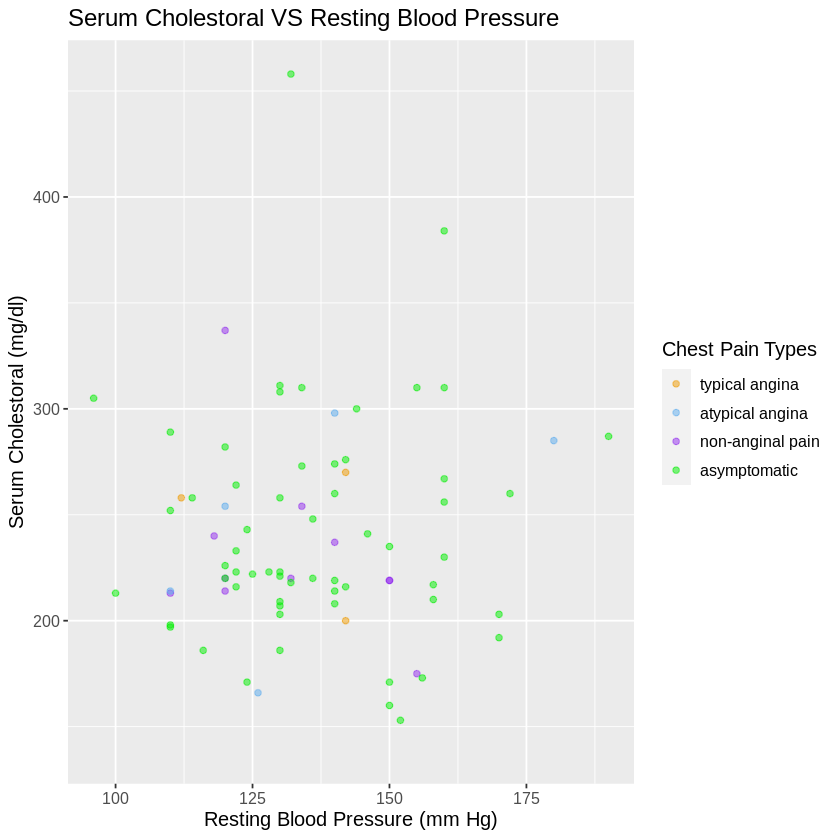

In [79]:
trestbps_chol <- heart_disease_train |>
  ggplot(aes(x = trestbps, y = chol, color = cp)) +
  geom_point(alpha = 0.5) +
  labs(x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholestoral (mg/dl)", color = "Chest Pain Types") + 
  scale_color_manual(labels = c("typical angina", "atypical angina","non-anginal pain","asymptomatic"), 
                     values = c("orange2", "steelblue2","purple2", "green2")) + 
  theme(text = element_text(size = 12)) +
    ggtitle("Serum Cholestoral VS Resting Blood Pressure")

trestbps_chol